## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams["figure.figsize"] = (7,4)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Exploratory Data Analysis and Visualization

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.shape

(768, 9)

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


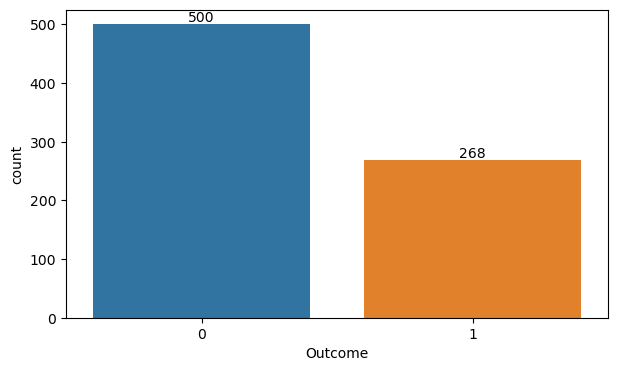

In [7]:
ax = sns.countplot(x='Outcome', data=df)
ax.bar_label(ax.containers[0]);

In [7]:
df=df[df.SkinThickness<70]
df=df[df.Glucose>0]
df=df[df.BloodPressure>35]
df=df[df.BMI>0]

In [8]:
df.shape

(720, 9)

In [9]:
df.Outcome.value_counts() 

0    473
1    247
Name: Outcome, dtype: int64

In [10]:
473/247  # ratio of number of the class zero to the class one

1.9149797570850202

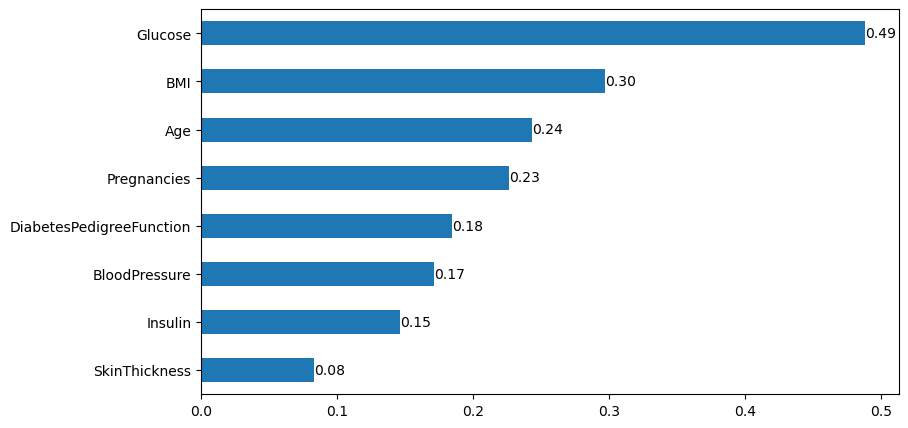

In [11]:
plt.figure(figsize=(9,5))
ax = df.corr()["Outcome"].drop("Outcome").sort_values().plot.barh()
ax.bar_label(ax.containers[0], fmt='%.2f');

## Train | Test Split

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X=df.drop(["Outcome"], axis=1)
y=df["Outcome"]

### Split the Data into train, validation and test data

In [13]:
# Split the data as train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

# Split the train data as train and validation datasets
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

In [14]:
# checking the shapes of datasets
X_train.shape, X_validation.shape, X_test.shape

((518, 8), (130, 8), (72, 8))

In [15]:
# checking the shapes of datasets
y_train.shape, y_validation.shape, y_test.shape

((518,), (130,), (72,))

In [16]:
# In Sagemaker the first column in train and validation datasets should be the target column.
# Concat target column with train and validation data as first column.
# No need to add target column in test datasets as it will be used to test the model performance after training.

train = pd.concat([pd.Series(y_train, index = X_train.index, name="Outcome"), X_train], axis=1)
validation = pd.concat([pd.Series(y_validation, index = X_validation.index, name="Outcome"), X_validation], axis=1)

In [17]:
# Checking the first 5 sample of train dataset
train.head()

,Outcome,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
56,1,7,187,68,39,304,37.7,0.254,41
641,0,4,128,70,0,0,34.3,0.303,24
32,0,3,88,58,11,54,24.8,0.267,22
503,0,7,94,64,25,79,33.3,0.738,41
732,1,2,174,88,37,120,44.5,0.646,24


In [18]:
# Checking the first 5 sample of validation dataset
validation.head()

,Outcome,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
16,1,0,118,84,47,230,45.8,0.551,31
313,0,3,113,50,10,85,29.5,0.626,25
118,0,4,97,60,23,0,28.2,0.443,22
584,1,8,124,76,24,600,28.7,0.687,52
614,1,11,138,74,26,144,36.1,0.557,50


In [19]:
# checking the shapes of datasets
train.shape, validation.shape

((518, 9), (130, 9))

In [20]:
# Save the train and validation datasets as csv file in order to load them into AWS S3 bucket.
# Where did we save these csv files?

train.to_csv('train.csv', index=False, header=False)
validation.to_csv('validation.csv', index=False, header=False)

### Saving train and validation csv files into S3 bucket

https://github.com/aws/sagemaker-python-sdk

In [21]:
# Import sagemaker and boto3 libraries.
# SageMaker Python SDK is an open source library for training and deploying machine learning models on Amazon SageMaker using Python scripts.
# Boto3 is the name of the Python SDK for AWS.
# It allows you to directly create, update, and delete AWS resources from your Python scripts.

import sagemaker, boto3

In [24]:
bucket = 'hillary-test'  # S3 bucket name that we have already created in AWS. You can copy it from AWS S3 service and paste here.
prefix = 'sagemaker-diabetes'  # Folder name that we will create for saving our datasets.

In [25]:
# Loading train and validation datasets into S3 bucket.
boto3.Session().resource('s3').Bucket(bucket).Object(prefix + '/data/train.csv').upload_file('train.csv')
boto3.Session().resource('s3').Bucket(bucket).Object(prefix + '/data/validation.csv').upload_file('validation.csv')

In [26]:
# Checking the datasets in AWS S3 bucket by listing
# We can check them also from AWS S3 console.

! aws s3 ls {bucket}/{prefix}/data --recursive

2023-03-28 08:21:45      15758 sagemaker-diabetes/data/train.csv
2023-03-28 08:21:45       3942 sagemaker-diabetes/data/validation.csv


## Built and Train the Model

In [26]:
# %pip instasll --upgrade boto3  # if the following code raise an error, run this before then restart the kernel.

In [27]:
# Defining the region and role variables which will be used for the connection to the AWS. 
region = sagemaker.Session().boto_region_name  # region = boto3.Session().region_name
print("AWS Region: {}".format(region))

role = sagemaker.get_execution_role()
print("RoleArn:{}".format(role))

AWS Region: us-east-1
RoleArn:arn:aws:iam::046402772087:role/service-role/AmazonSageMaker-ExecutionRole-20230307T112272


In [28]:
# Defining output path in which outputs will be loaded during model training.

s3_output_location = 's3://{}/{}/{}'.format(bucket, prefix, 'output') 
s3_output_location

's3://hillary-test/sagemaker-diabetes/output'

In [29]:
# Defining built-in algorithm name and version which we will use for model creation.
container = sagemaker.image_uris.retrieve("xgboost", region, version="latest")
print(container)

811284229777.dkr.ecr.us-east-1.amazonaws.com/xgboost:latest


In [83]:
# for a specific version i.e. xgboost version 1.2-2
# container = sagemaker.image_uris.retrieve("xgboost", region, version="1.2-2")
# print(container)

In [30]:
# Model creation using sagemaker estimator function

xgb_model = sagemaker.estimator.Estimator(container,  # model algorithm
                                          role,  # role to connect AWS
                                          base_job_name="hillary-xgboost-test",  # training job name (if it is none, sagemaker gives a name automatically)
                                          instance_count=1,  # the number of EC2 that will be used for training
                                          instance_type='ml.m4.xlarge', # type of EC2
                                          volume_size = 1,  # EC2 EBS volume size
                                          output_path = s3_output_location,  # output path in which training outputs will be saved
                                          sagemaker_session=sagemaker.Session(),  # sagemaker session for training job
                                          )

In [31]:
# Setting the model hyperparameters
xgb_model.set_hyperparameters(max_depth=2,
                              eta=0.2,
                              scale_pos_weight= 1.9149797570850202,  # it is the ratio of number of the class zero to the class one
                              num_round=100,
                              objective = 'binary:logistic',  # objective = "reg:logistic"
                              early_stopping_rounds=10)

In [32]:
# Import training input method which will be used to prepare train and validation data before model training
from sagemaker.session import TrainingInput

# Preparing train and validation data for model training 
train_input = TrainingInput('s3://{}/{}/{}'.format(bucket, prefix, 'data/train.csv'), content_type='csv')
validation_input = TrainingInput('s3://{}/{}/{}'.format(bucket, prefix, 'data/validation.csv'), content_type='csv')

In [33]:
# Convert the data we prepared into dictionary format for model training
data_channels = {'train': train_input, 'validation': validation_input}

In [34]:
# Model training with data_channels. At this step training jobs will be created.
xgb_model.fit(data_channels)

# Let's check whether training job is created or not from AWS console.

# Let's check whether the output(model.tar.gz) occurs when training job is completed.

INFO:sagemaker:Creating training-job with name: hillary-xgboost-test-2023-03-28-08-26-34-415


2023-03-28 08:26:34 Starting - Starting the training job...
2023-03-28 08:27:00 Starting - Preparing the instances for training.........
2023-03-28 08:28:20 Downloading - Downloading input data...
2023-03-28 08:28:45 Training - Downloading the training image...
2023-03-28 08:29:21 Training - Training image download completed. Training in progress..Arguments: train
[2023-03-28:08:29:35:INFO] Running standalone xgboost training.
[2023-03-28:08:29:35:INFO] File size need to be processed in the node: 0.02mb. Available memory size in the node: 8600.49mb
[2023-03-28:08:29:35:INFO] Determined delimiter of CSV input is ','
[08:29:35] S3DistributionType set as FullyReplicated
[08:29:35] 518x8 matrix with 4144 entries loaded from /opt/ml/input/data/train?format=csv&label_column=0&delimiter=,
[2023-03-28:08:29:35:INFO] Determined delimiter of CSV input is ','
[08:29:35] S3DistributionType set as FullyReplicated
[08:29:35] 130x8 matrix with 1040 entries loaded from /opt/ml/input/data/validation?fo

## Create Endpoint

In [35]:
# CSVSerializer : Serialize data of various formats to a CSV-formatted string

from sagemaker.serializers import CSVSerializer

# Deploy the trained model into an endpoint
# At this step an endpoint will be created
predictor = xgb_model.deploy(initial_instance_count=1,  # the number of EC2 for endpoint
                            instance_type='ml.m5.xlarge',  # type of EC2
                            serializer = CSVSerializer())  # data format for prediction

# Let's check whether endpoint is created.

INFO:sagemaker:Creating model with name: hillary-xgboost-test-2023-03-28-08-34-55-639
INFO:sagemaker:Creating endpoint-config with name hillary-xgboost-test-2023-03-28-08-34-55-639
INFO:sagemaker:Creating endpoint with name hillary-xgboost-test-2023-03-28-08-34-55-639


------!

In [36]:
# The name of the  endpoint we created

endpoint_name = predictor.endpoint_name  # alternatively we can define endpoint name manually: endpoint_name = 'sagemaker-xgboost-2023-01-04-04-05-36-670'
endpoint_name

'hillary-xgboost-test-2023-03-28-08-34-55-639'

# Prediction using Endpoint Name

In [37]:
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
198,4,109,64,44,99,34.8,0.905,26
598,1,173,74,0,0,36.8,0.088,38
102,0,125,96,0,0,22.5,0.262,21
226,0,101,76,0,0,35.7,0.198,26
585,1,93,56,11,0,22.5,0.417,22


In [38]:
# Saving test data as csv file for prediction
X_test.to_csv('test.csv', index=False, header=False)  # without target variable

In [39]:
# Reading and preparing the test data as payload for prediction
with open('test.csv', 'r') as f:
    payload = f.read().strip('\n')

In [40]:
# checking the content of payload
payload

'4,109,64,44,99,34.8,0.905,26\n1,173,74,0,0,36.8,0.088,38\n0,125,96,0,0,22.5,0.262,21\n0,101,76,0,0,35.7,0.198,26\n1,93,56,11,0,22.5,0.417,22\n2,108,80,0,0,27.0,0.259,52\n2,108,64,0,0,30.8,0.158,21\n6,125,78,31,0,27.6,0.565,49\n1,157,72,21,168,25.6,0.123,24\n1,83,68,0,0,18.2,0.624,27\n1,124,60,32,0,35.8,0.514,21\n13,158,114,0,0,42.3,0.257,44\n4,134,72,0,0,23.8,0.277,60\n2,100,66,20,90,32.9,0.867,28\n4,123,80,15,176,32.0,0.443,34\n4,84,90,23,56,39.5,0.159,25\n9,72,78,25,0,31.6,0.28,38\n4,83,86,19,0,29.3,0.317,34\n8,154,78,32,0,32.4,0.443,45\n10,179,70,0,0,35.1,0.2,37\n4,115,72,0,0,28.9,0.376,46\n2,95,54,14,88,26.1,0.748,22\n2,114,68,22,0,28.7,0.092,25\n11,85,74,0,0,30.1,0.3,35\n2,112,75,32,0,35.7,0.148,21\n8,143,66,0,0,34.9,0.129,41\n0,139,62,17,210,22.1,0.207,21\n1,90,68,8,0,24.5,1.138,36\n4,110,66,0,0,31.9,0.471,29\n2,100,64,23,0,29.7,0.368,21\n13,106,70,0,0,34.2,0.251,52\n7,181,84,21,192,35.9,0.586,51\n3,187,70,22,200,36.4,0.408,36\n0,126,84,29,215,30.7,0.52,24\n11,155,76,28,150,33.3

In [41]:
# Create sagemaker runtime object to send request to endpoint and get response

sagemaker_runtime = boto3.client("sagemaker-runtime", region_name=boto3.Session().region_name)

# Invoke endpoint to get prediction results
response = sagemaker_runtime.invoke_endpoint(  
                            EndpointName=endpoint_name,  # endpoint name we created (should be unique)
                            Body=payload, # prediction data
                            ContentType = 'text/csv')  # type of data

# Optional - to see prediction result
# print(response['Body'].read().decode('utf-8'))

INFO:botocore.credentials:Found credentials from IAM Role: BaseNotebookInstanceEc2InstanceRole


In [42]:
# The prediction result is in json format and "Body" key contains the prediction values.
response

{'ResponseMetadata': {'RequestId': 'd203b587-c8c3-410a-974b-17a5e31edaff',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': 'd203b587-c8c3-410a-974b-17a5e31edaff',
   'x-amzn-invoked-production-variant': 'AllTraffic',
   'date': 'Tue, 28 Mar 2023 08:42:53 GMT',
   'content-type': 'text/csv; charset=utf-8',
   'content-length': '1393'},
  'RetryAttempts': 0},
 'ContentType': 'text/csv; charset=utf-8',
 'InvokedProductionVariant': 'AllTraffic',
 'Body': <botocore.response.StreamingBody at 0x7f28791c0400>}

In [43]:
# prediction results
results = response['Body'].read().decode('utf-8')
results

'0.3873826861381531,0.8133384585380554,0.11451607197523117,0.15497027337551117,0.06449843943119049,0.2610611915588379,0.2995612323284149,0.5149786472320557,0.5817204713821411,0.06449843943119049,0.4646185040473938,0.8526740074157715,0.22952598333358765,0.18755793571472168,0.6740153431892395,0.15497027337551117,0.3418002724647522,0.29272186756134033,0.751653790473938,0.8304170966148376,0.5172712802886963,0.06449843943119049,0.2591714859008789,0.43561118841171265,0.2995612323284149,0.6726301312446594,0.14202702045440674,0.10040055215358734,0.48345714807510376,0.17069615423679352,0.5477213859558105,0.8809031248092651,0.8683291077613831,0.4646185040473938,0.8777631521224976,0.18755793571472168,0.15497027337551117,0.3063046336174011,0.35644543170928955,0.5970978140830994,0.4685020446777344,0.5415210723876953,0.18755793571472168,0.3992386758327484,0.07767873257398605,0.6776959300041199,0.8809031248092651,0.3948822319507599,0.7220278382301331,0.17889441549777985,0.5938748121261597,0.158747941

In [44]:
# prediction results(probability values) as numpy array
results = np.fromstring(results, sep=',') # sep=',' or '\n' or ' ' can be used. 
results

array([0.38738269, 0.81333846, 0.11451607, 0.15497027, 0.06449844,
       0.26106119, 0.29956123, 0.51497865, 0.58172047, 0.06449844,
       0.4646185 , 0.85267401, 0.22952598, 0.18755794, 0.67401534,
       0.15497027, 0.34180027, 0.29272187, 0.75165379, 0.8304171 ,
       0.51727128, 0.06449844, 0.25917149, 0.43561119, 0.29956123,
       0.67263013, 0.14202702, 0.10040055, 0.48345715, 0.17069615,
       0.54772139, 0.88090312, 0.86832911, 0.4646185 , 0.87776315,
       0.18755794, 0.15497027, 0.30630463, 0.35644543, 0.59709781,
       0.46850204, 0.54152107, 0.18755794, 0.39923868, 0.07767873,
       0.67769593, 0.88090312, 0.39488223, 0.72202784, 0.17889442,
       0.59387481, 0.15874794, 0.8488214 , 0.5879572 , 0.8633641 ,
       0.39488223, 0.12243346, 0.52244186, 0.15497027, 0.30310458,
       0.15497027, 0.52476138, 0.36052829, 0.87634468, 0.29272187,
       0.72421747, 0.05787356, 0.40788993, 0.56617063, 0.67378831,
       0.17069615, 0.47937572])

In [45]:
# converting prediction results into 0 and 1 classes.
results1= np.round(results)
results1

array([0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1.,
       0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
       1., 1., 0., 0.])

## Check the Model Performance

In [46]:
# Import related methods to check model performans.
from sklearn.metrics import confusion_matrix, classification_report

In [47]:
# model evaluation metrics for test data

print(confusion_matrix(y_test, results1))
print("*"*50)
print(classification_report(y_test, results1))

[[36 11]
 [ 8 17]]
**************************************************
              precision    recall  f1-score   support

           0       0.82      0.77      0.79        47
           1       0.61      0.68      0.64        25

    accuracy                           0.74        72
   macro avg       0.71      0.72      0.72        72
weighted avg       0.74      0.74      0.74        72



### with treshold

In [48]:
# converting prediction results into 0 and 1 classes using different treshold values.
treshold= 0.4
results2= (results > treshold).astype("int32")
results2

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1], dtype=int32)

In [49]:
# model evaluation metrics for test data with different tresholds

print(confusion_matrix(y_test, results2))
print("*"*50)
print(classification_report(y_test, results2))

[[31 16]
 [ 6 19]]
**************************************************
              precision    recall  f1-score   support

           0       0.84      0.66      0.74        47
           1       0.54      0.76      0.63        25

    accuracy                           0.69        72
   macro avg       0.69      0.71      0.69        72
weighted avg       0.74      0.69      0.70        72

